<a href="https://colab.research.google.com/github/Kondasagar/Retail-Sales-Prediction-Regression-Model/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

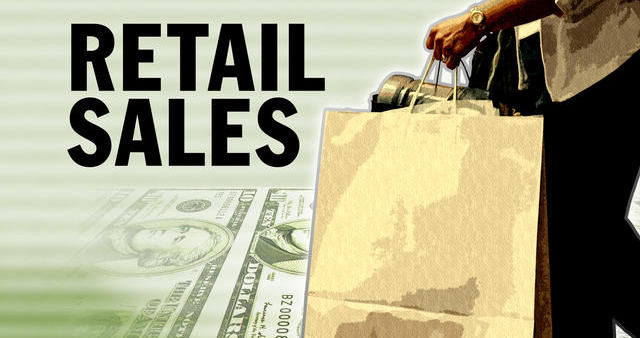

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Importing Modules and Libraries**

In [2]:
#let's import the modules which are important for our study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

# **Step 1: Reading and Understanding the Data**

---


* Let's start with the following steps:

 1. Importing data using the pandas library
 2. Understanding the structure of the data

* Mounting the gooogle drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
# Reading the data sets of rossmann stores which contain sales  and sales data set as test data set
rossmann_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Retail Sales Prediction Capstone_2/Copy of Rossmann Stores Data.csv',parse_dates = True)

# additional store data

store_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Retail Sales Prediction Capstone_2/Copy of store.csv')

In [101]:
# detailed info of rossmann stores data set
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* No null values in rossmann store data set

In [102]:
# first five rows in rossmann_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [103]:
# summary of numerical features in rossmann_df
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [104]:
# last five rows of rossmann_df
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [105]:
# duplicate rows in rossmann_df
rossmann_df.duplicated().sum()

0

In [106]:
# detailed info of  stores data set
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [107]:
# numerical features info in store_df
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [108]:
# missing values?
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [109]:
# missing values?
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [110]:
# first five rows
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [111]:
# last five rows in store_df
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [112]:
# duplicate rows in rossmann_df
rossmann_df.duplicated().sum()

0

In [113]:
# duplicate rows in store_df
store_df.duplicated().sum()

0

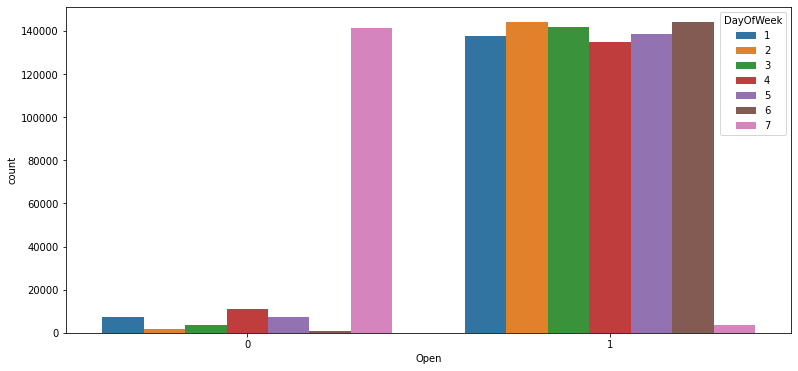

In [114]:
# whether stores are opened or not on particular day of the week
plt.figure(figsize=(13,6))
sns.countplot(x='Open',hue='DayOfWeek', data=rossmann_df)
plt.show()

* **Observation** : Most of the times, the stores are open. But on sunday probobility of a store to be opened is less as you can see in above count plot.

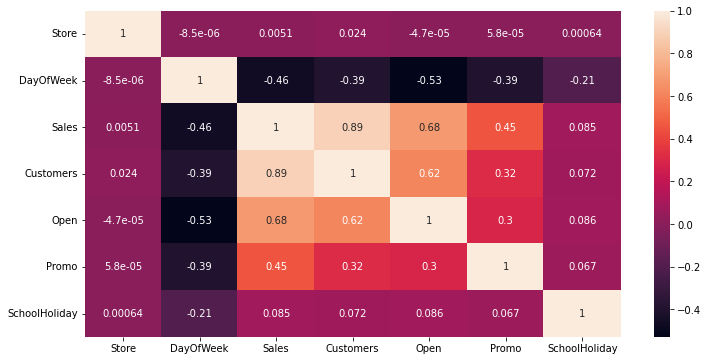

In [115]:
# correlation matrix of all features in rossmann dataset
plt.figure(figsize=(12,6))
sns.heatmap(rossmann_df[rossmann_df.columns].corr(),annot=True)
plt.show()

* In correlation matrix, we can see relationship between features which are numerical. that is why there is no Date feature, stateholiday feature in above matrix. 

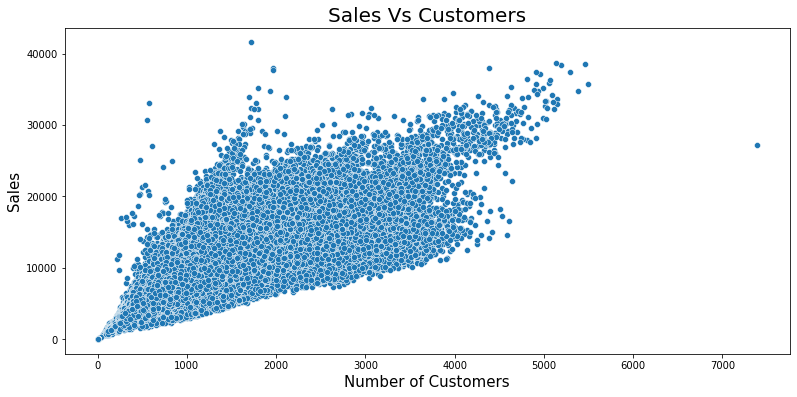

In [116]:
# scatter plot between customers and sales
plt.figure(figsize=(13,6))
sns.scatterplot(data=rossmann_df,x='Customers',y='Sales')
plt.title('Sales Vs Customers',fontsize=20)
plt.xlabel('Number of Customers',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

* **Inference**: On a particular day in a specific store, the number of customers ranging from 0 to 5600 and sales ranging from 0 to 4000 units.
* relationship between sales and number of customers is linear.

In [117]:
# defining a function for modularity purpose.
def plotter(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=StringA, y=StringB, data=rossmann_df ,hue="DayOfWeek", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=rossmann_df ,hue="DayOfWeek", ax=axes[1])

# Step 2: Creationg new variables or features for better understanding of dataset


---



In [118]:

# Extraction of data
rossmann_df['Year']=pd.to_datetime(rossmann_df['Date']).dt.year
rossmann_df['Month']=pd.to_datetime(rossmann_df['Date']).dt.month
rossmann_df['Day']=pd.to_datetime(rossmann_df['Date']).dt.day
rossmann_df['WeekofYear']=pd.to_datetime(rossmann_df['Date']).dt.weekofyear

# creating new variables
rossmann_df['SalesPerCustomer']=rossmann_df['Sales']/rossmann_df['Customers']

# removing the Date column
rossmann_df.drop('Date',axis=1,inplace=True)


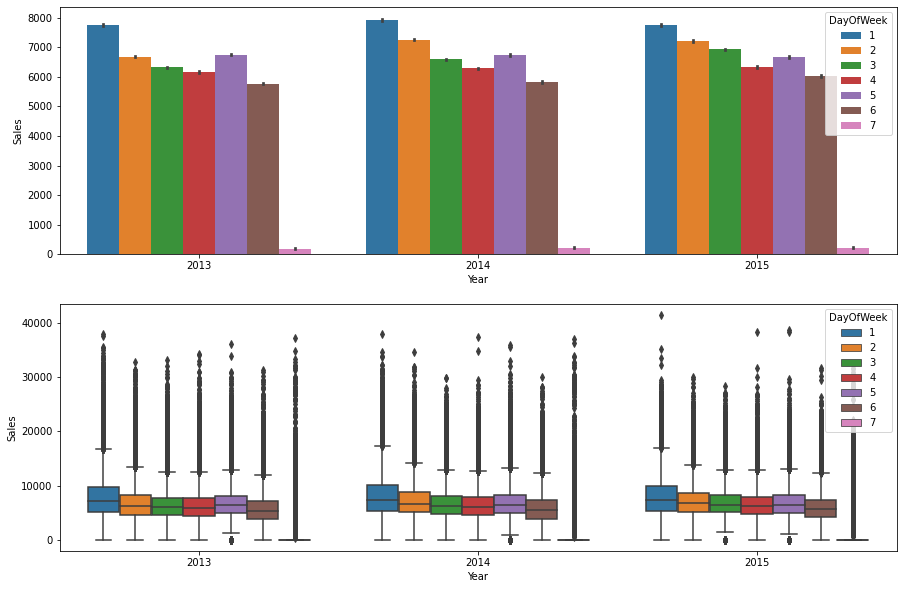

In [119]:
# Sales over years?
plotter('Year','Sales')

* On Monaday, the sales are high in every year. And on sunday the number of sales are less.

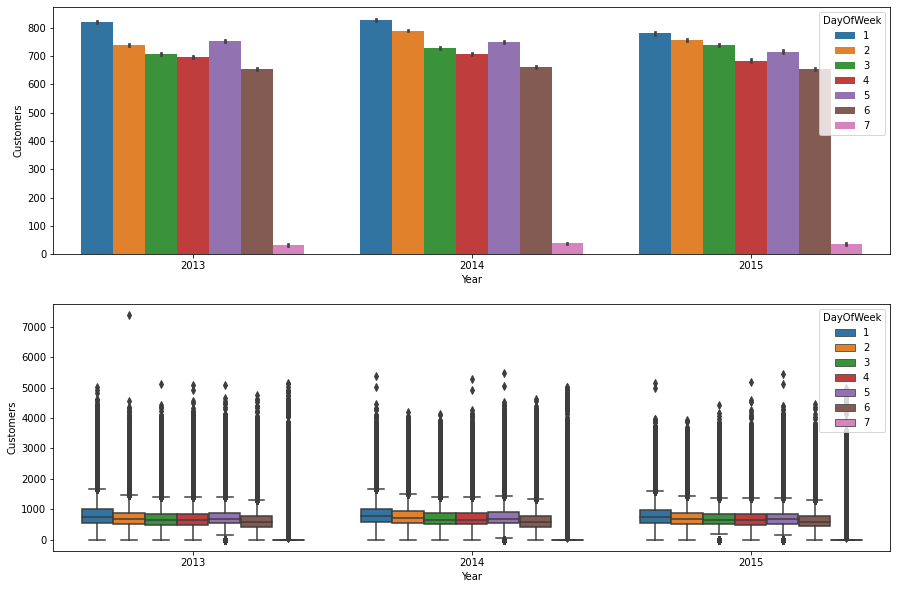

In [120]:
# relationship between number of customers and Year
plotter("Year","Customers")

* On Monaday, the customers entering store are high in every year. And on sunday the number of customers are less.

In [121]:
rossmann_df.tail(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer
1017206,1113,2,0,0,0,0,a,1,2013,1,1,1,NaN
1017207,1114,2,0,0,0,0,a,1,2013,1,1,1,NaN
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1,NaN


* Observation: NUll values in SalesPerCustomer is due to Zeros in Customer feature. So we replace these null values with zero.

In [122]:
# value counts in SchoolHoliday feature
rossmann_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

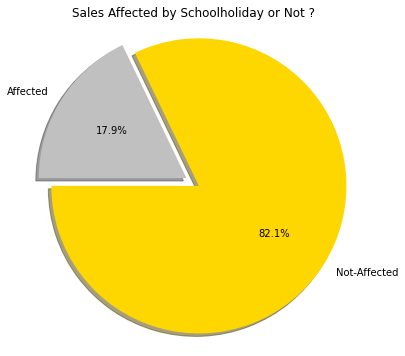

In [123]:
# SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

labels = 'Not-Affected' , 'Affected'
sizes = rossmann_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Step 3: Data Cleaning and Manipulations (Data Wrangling) and EDA

---
* Let us look into store_df and rossmann_df do necessary manipulations for better analysis.



In [124]:
# missing values in CompetitionDistance
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [125]:
print(f" median of competition distance {store_df['CompetitionDistance'].median()} ")

print(f" mean of competition distance {store_df['CompetitionDistance'].mean()} ")

 median of competition distance 2325.0 
 mean of competition distance 5404.901079136691 


* Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values (which is twice less than the average).

In [126]:
# fill NaN with a median value (skewed distribuion) (positive skewness or right side skewnwss) (mean>mode>median)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

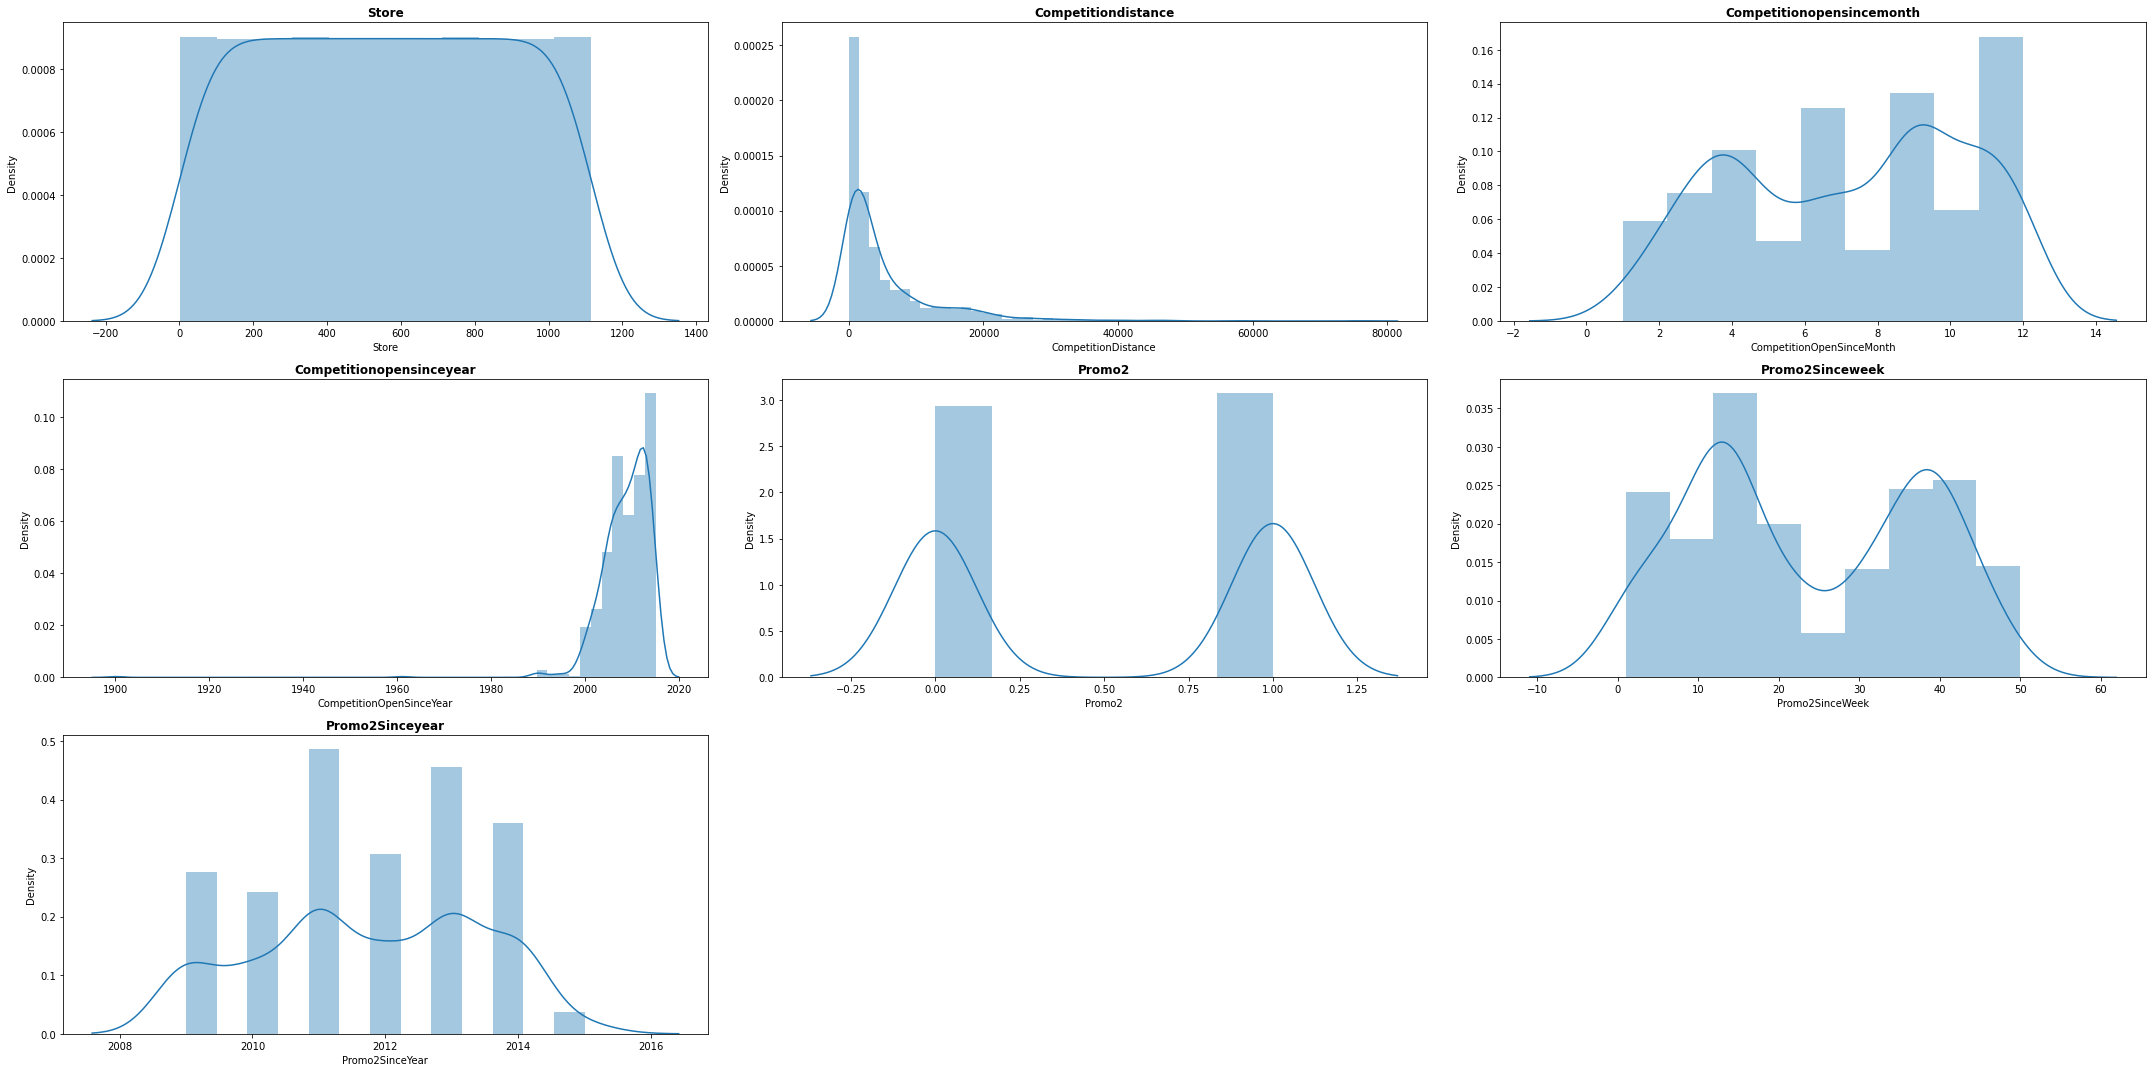

In [127]:
# Distribution of numerical features in sore_df
# Visualizing the distributions.
plt.figure(figsize=(30,15))
for n,column in enumerate(store_df.describe().columns):
  plt.subplot(3, 3, n+1)
  sns.distplot(store_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [128]:
# missing values?
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [129]:
# let us replace null values in store_df 
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].median(), inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].median(), inplace = True)
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].median(), inplace = True)
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].median(), inplace = True)
store_df['PromoInterval'].fillna('Not Known', inplace = True)

In [130]:
# copying store_df
store=store_df.copy()
temp = []
for i in rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()["Sales"]:
  temp.append(i)
store["Sales"] = temp

In [131]:
temp = []
for i in rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()["Customers"]:
  temp.append(i)
store["Customers"] = temp

In [132]:
# missing values?
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [133]:
# missing values?
rossmann_df.isnull().sum()

Store                    0
DayOfWeek                0
Sales                    0
Customers                0
Open                     0
Promo                    0
StateHoliday             0
SchoolHoliday            0
Year                     0
Month                    0
Day                      0
WeekofYear               0
SalesPerCustomer    172869
dtype: int64

In [134]:
# replace NA's by 0 (because sales and customers )
rossmann_df.fillna(0, inplace = True)

In [135]:
# missing values?
rossmann_df.isnull().sum()

Store               0
DayOfWeek           0
Sales               0
Customers           0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Year                0
Month               0
Day                 0
WeekofYear          0
SalesPerCustomer    0
dtype: int64

**Now we don't have any null values in rossmann_df and store_df data sets**

* We know that store_df is giving more information about store and it can be append to rossmann_df to give good picture about our data.

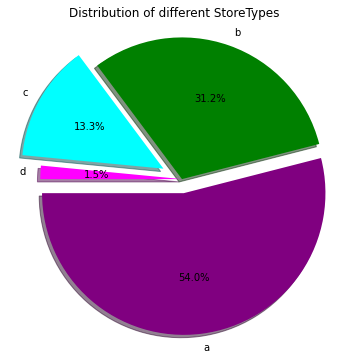

In [136]:
labels = 'a','b','c','d'
sizes = store_df.StoreType.value_counts()
colors = 'purple','green','cyan','magenta'
explode = 0.1,0.0,0.15,0.0
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',startangle= 180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Store Type a has higher count and store type d is less count**

In [137]:
def plotnew(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(12, 15)
  sns.barplot(x=StringA, y=StringB, data=store ,hue="StoreType", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=store ,hue="StoreType", ax=axes[1])

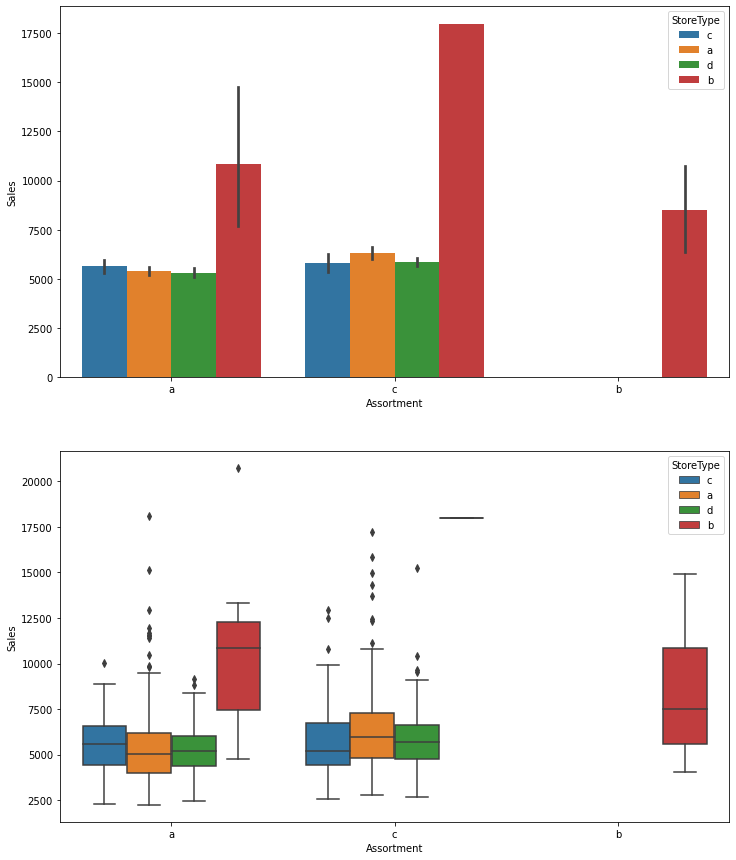

In [138]:
# how are sales depending on assortment
plotnew("Assortment" , "Sales")

* Inference: For Assortment c the number of sales are high and for assortment b the number of sales are less.
* Store type b having high number of sales

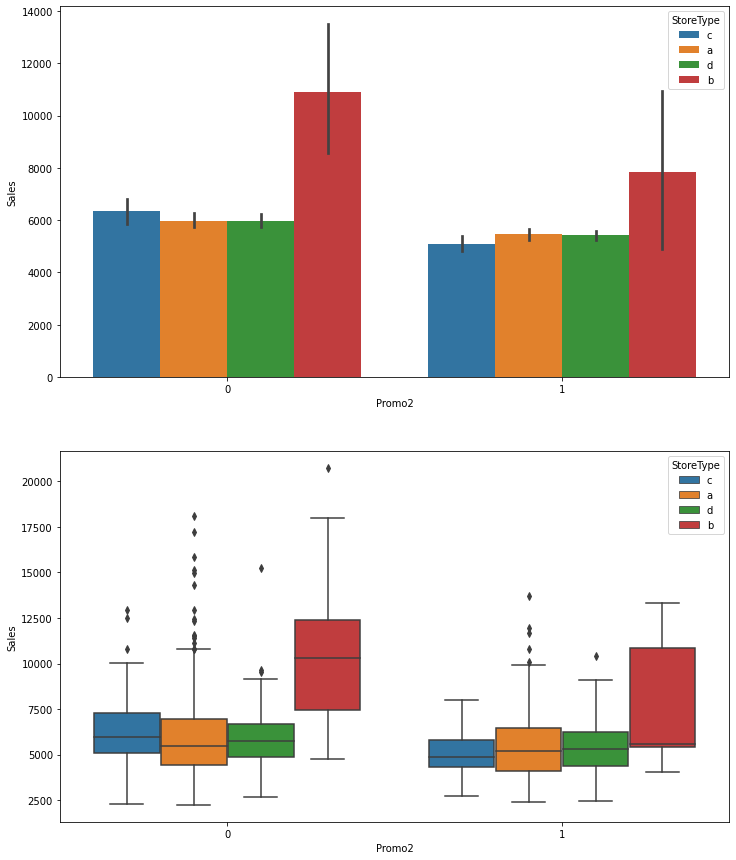

In [139]:
plotnew("Promo2" , "Sales")

In [140]:
print("Joining Rossmann data set set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together

final_df = pd.merge(rossmann_df, store_df, how = 'inner', on = 'Store')

pd.set_option('display.max_columns', None)

print("In total: (rows,columns)", final_df.shape)

final_df.head()

Joining Rossmann data set set with an additional store information.
In total: (rows,columns) (1017209, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Not Known
1,1,4,5020,546,1,1,0,1,2015,7,30,31,9.194139,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Not Known
2,1,3,4782,523,1,1,0,1,2015,7,29,31,9.143403,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Not Known
3,1,2,5011,560,1,1,0,1,2015,7,28,31,8.948214,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Not Known
4,1,1,6102,612,1,1,0,1,2015,7,27,31,9.970588,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Not Known


In [141]:
# info of final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  WeekofYear                 1017209 non-null  int64  
 12  SalesPerCustomer           1017209 non-null  float64
 13  StoreType   

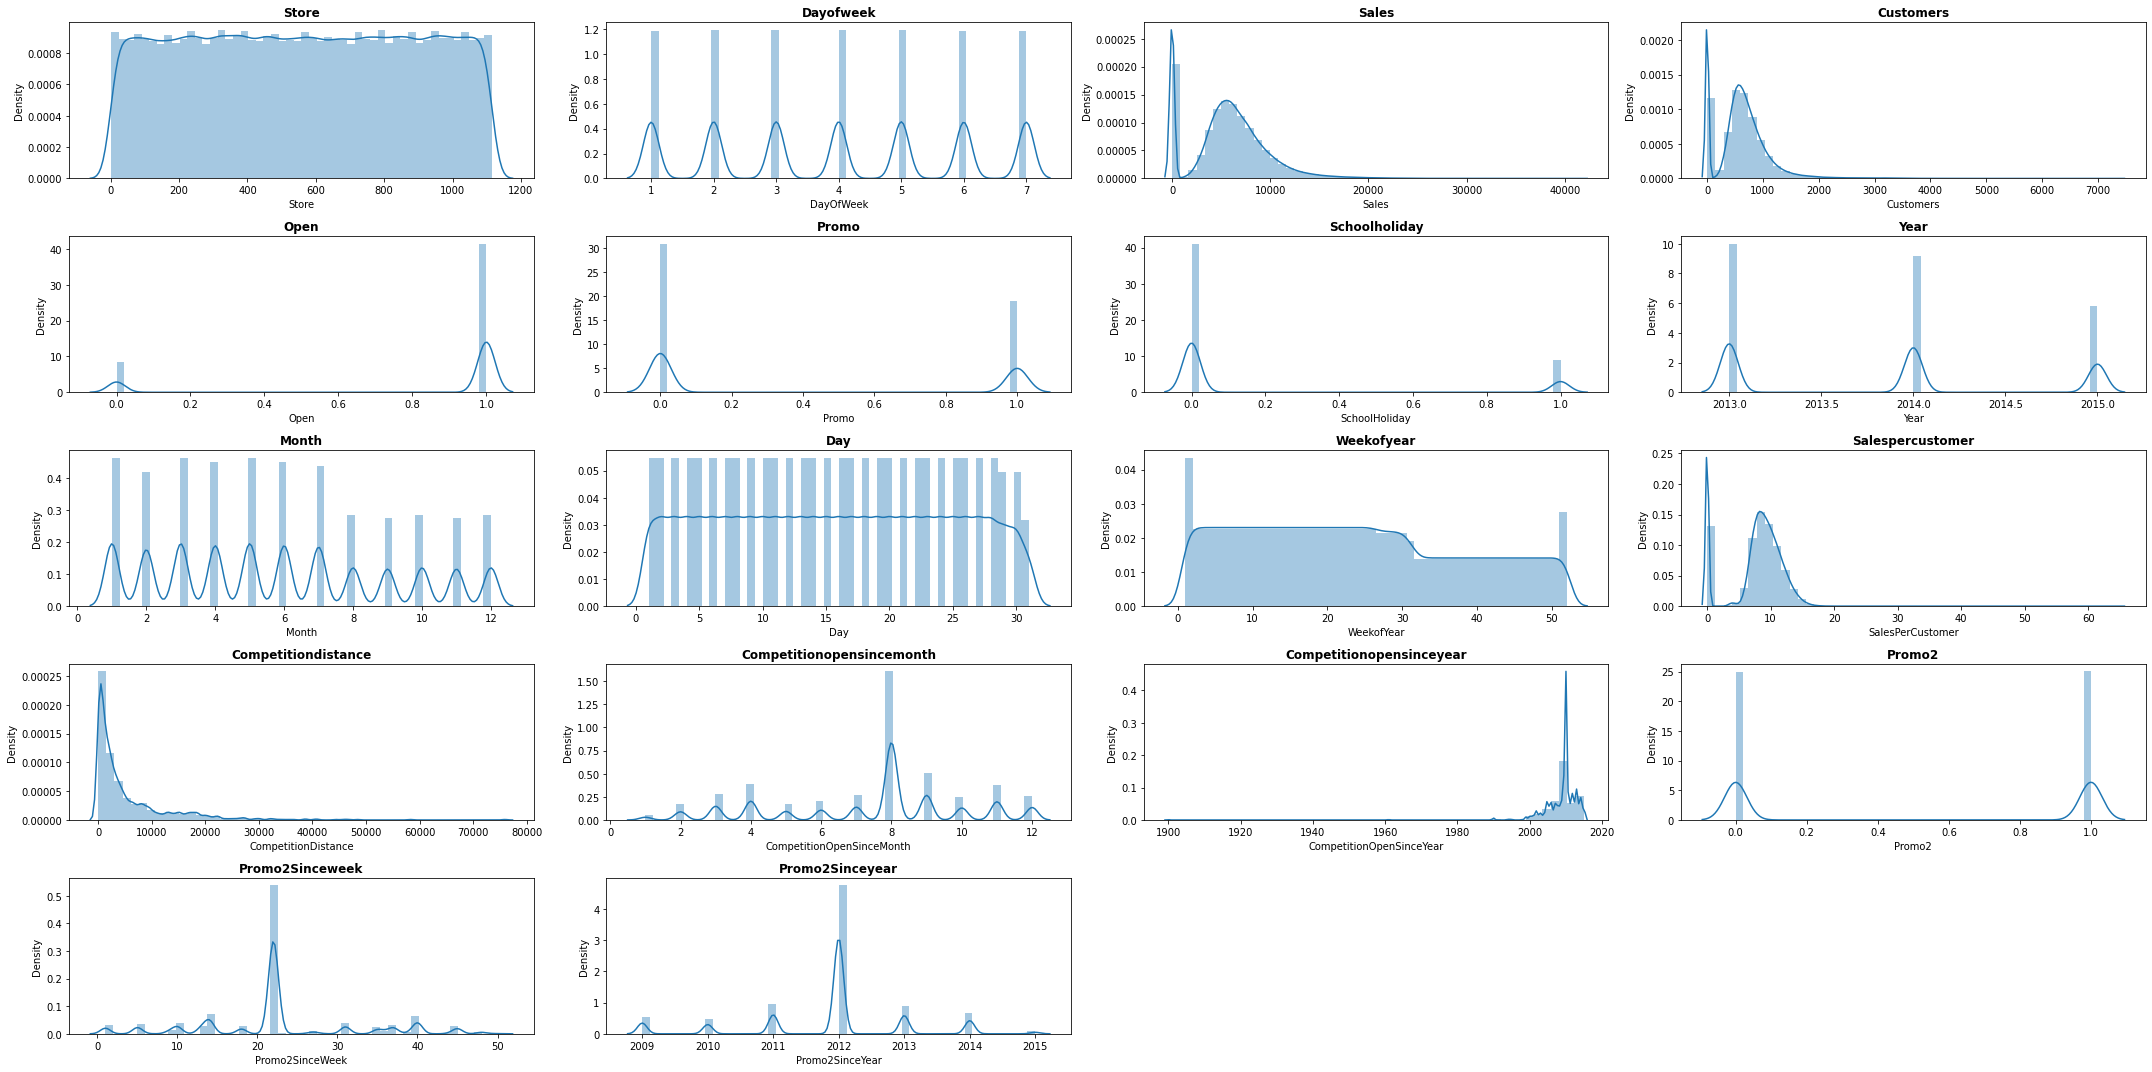

In [142]:
# Distribution of numerical features in final_df
# Visualizing the distributions.
plt.figure(figsize=(30,15))
for n,column in enumerate(final_df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.distplot(final_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [143]:
# sales is dependent variable in our data set
#checking skewness of the dependend variable
print(f'Skewness of original data : {final_df.Sales.skew()}')
print(f'Skewness after log transformation : {np.log(final_df.Sales).skew()}')
print(f'Skewness after transformation : {np.sqrt(final_df.Sales).skew()}')

Skewness of original data : 0.6414596158103798
Skewness after log transformation : nan
Skewness after transformation : -0.8970825142894521


* For large number of rows, the sales are zero when stores are not open.
* It would be better to analyse the sales when store are open because this is logical thing.

In [144]:
# Removing unnecessary rows in our dataset
final_df=final_df[final_df['Open']!=0]
final_df=final_df[final_df['Sales']>0]

In [145]:
# sales is dependent variable in our data set
#checking skewness of the dependend variable
print(f'Skewness of original data : {final_df.Sales.skew()}')
print(f'Skewness after log transformation : {np.log(final_df.Sales).skew()}')
print(f'Skewness after transformation : {np.sqrt(final_df.Sales).skew()}')

Skewness of original data : 1.594928835753748
Skewness after log transformation : -0.10968460576537623
Skewness after transformation : 0.7012367857486632


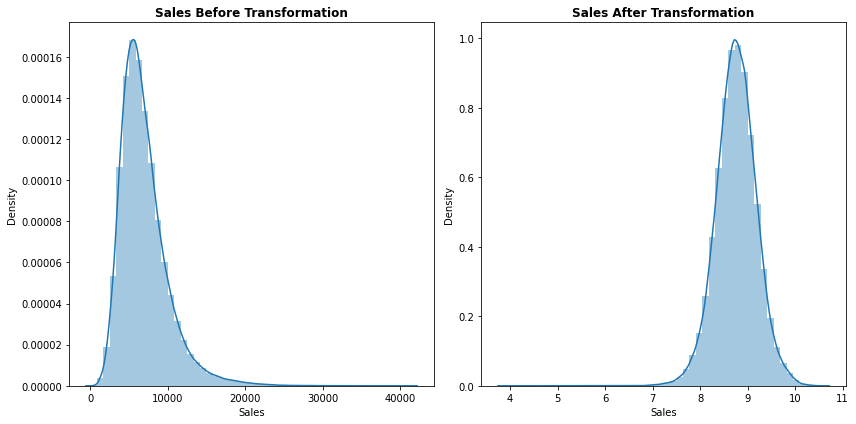

In [146]:
# since log transformation giving  skewness (-0.1) between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it
plt.figure(figsize=(12,6))
plot = plt.subplot(1,2,1)
sns.distplot(final_df['Sales']).set_title('Sales Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.log(final_df['Sales'])).set_title('Sales After Transformation',weight='bold')
plt.tight_layout()

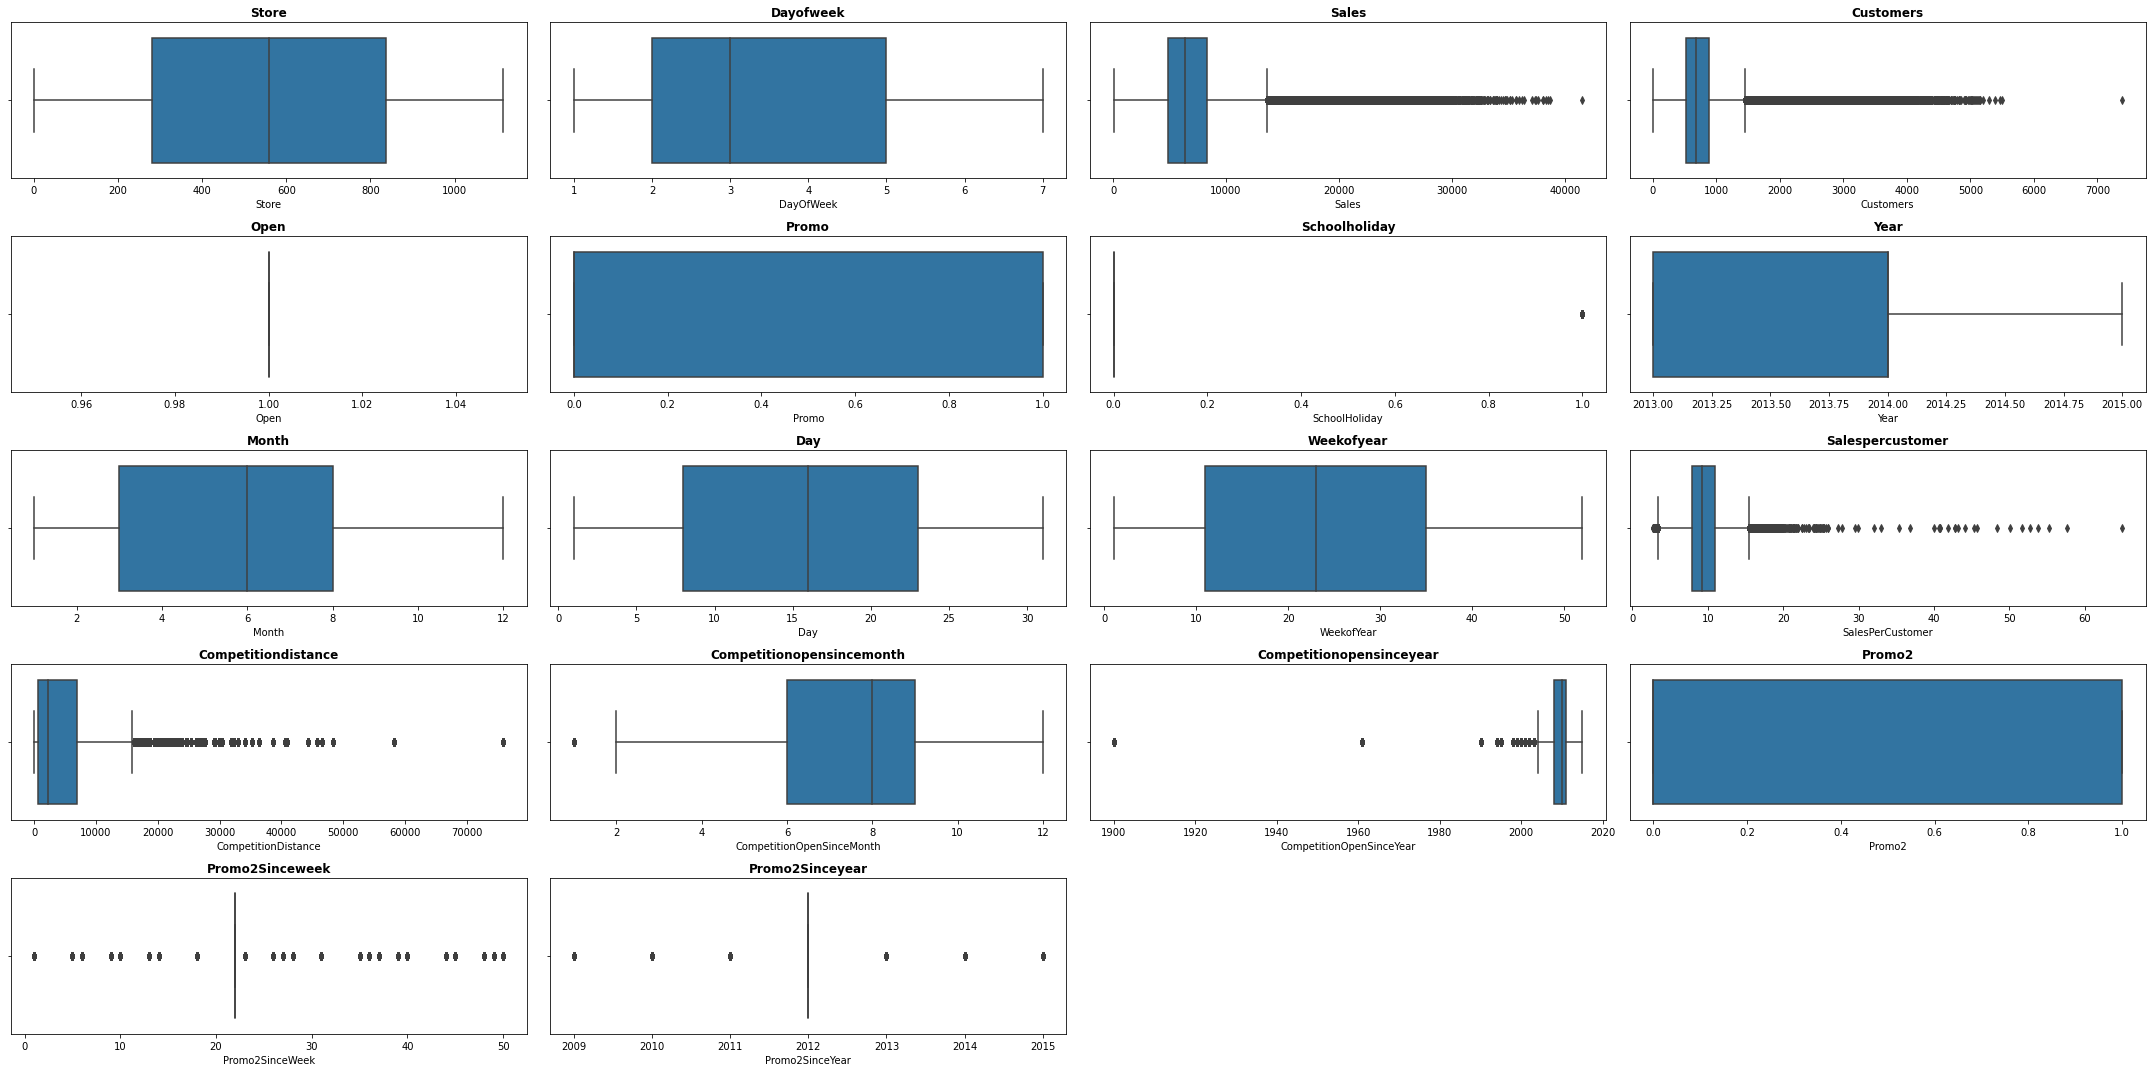

In [147]:
# Checking for outliers
plt.figure(figsize=(30,15))
for n,column in enumerate(final_df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(final_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [148]:
# dropping the feature named Open
final_df.drop('Open',axis=1,inplace=True)

In [149]:
# Let us take care of the categorical features
categorical_features = [i for i in final_df.columns if i not in final_df.describe().columns]
categorical_features

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [150]:
# StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
#  Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# None is replaced with 'd'
final_df['StateHoliday'] = final_df['StateHoliday'].replace(['0',0],'d')

In [151]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(final_df[col].value_counts(),'\n')

d    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64 

a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64 

a    444875
c    391254
b      8209
Name: Assortment, dtype: int64 

Not Known           423292
Jan,Apr,Jul,Oct     242397
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64 



In [152]:
# Now it is time convert these categorical data into numerical by using get dummies method or rename method (label encoding) or one hot encoding
# Defining a label encoder based on above data
encoder = {'StateHoliday':{'d':0, 'a':1, 'b':2,'c':3}, 'Assortment':{'a':0,'c':1,'b':2},
          'PromoInterval': {'Not Known':0, 'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}}

In [153]:
# Label Encoding
final_df = final_df.replace(encoder)

In [154]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Sales                      844338 non-null  int64  
 3   Customers                  844338 non-null  int64  
 4   Promo                      844338 non-null  int64  
 5   StateHoliday               844338 non-null  int64  
 6   SchoolHoliday              844338 non-null  int64  
 7   Year                       844338 non-null  int64  
 8   Month                      844338 non-null  int64  
 9   Day                        844338 non-null  int64  
 10  WeekofYear                 844338 non-null  int64  
 11  SalesPerCustomer           844338 non-null  float64
 12  StoreType                  844338 non-null  object 
 13  Assortment                 8

In [155]:
# One-Hot encoding the categorical parameters using get_dummies() 
final_df=pd.get_dummies(final_df, columns = ['StoreType'])

In [156]:
# first five rows in final_df
final_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,5,5263,555,1,0,1,2015,7,31,31,9.482883,0,1270.0,9.0,2008.0,0,22.0,2012.0,0,0,0,1,0
1,1,4,5020,546,1,0,1,2015,7,30,31,9.194139,0,1270.0,9.0,2008.0,0,22.0,2012.0,0,0,0,1,0
2,1,3,4782,523,1,0,1,2015,7,29,31,9.143403,0,1270.0,9.0,2008.0,0,22.0,2012.0,0,0,0,1,0
3,1,2,5011,560,1,0,1,2015,7,28,31,8.948214,0,1270.0,9.0,2008.0,0,22.0,2012.0,0,0,0,1,0
4,1,1,6102,612,1,0,1,2015,7,27,31,9.970588,0,1270.0,9.0,2008.0,0,22.0,2012.0,0,0,0,1,0


In [157]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Sales                      844338 non-null  int64  
 3   Customers                  844338 non-null  int64  
 4   Promo                      844338 non-null  int64  
 5   StateHoliday               844338 non-null  int64  
 6   SchoolHoliday              844338 non-null  int64  
 7   Year                       844338 non-null  int64  
 8   Month                      844338 non-null  int64  
 9   Day                        844338 non-null  int64  
 10  WeekofYear                 844338 non-null  int64  
 11  SalesPerCustomer           844338 non-null  float64
 12  Assortment                 844338 non-null  int64  
 13  CompetitionDistance        8

In [158]:
# summary of data
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear,SalesPerCustomer,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,0.446356,0.001418,0.193578,2013.831945,5.845774,15.835706,23.646946,9.493641,0.482830,5450.044852,7.471434,2009.112023,0.498670,22.625420,2011.877292,0.805774,0.541302,0.018429,0.133795,0.306474
std,321.730861,1.723712,3103.815515,401.194153,0.497114,0.047578,0.395102,0.777271,3.323959,8.683392,14.389931,2.197448,0.518797,7801.082007,2.675261,4.973570,0.499999,9.977114,1.179338,0.980689,0.498292,0.134496,0.340432,0.461029
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,2.749075,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000,7.895571,0.000000,710.000000,6.000000,2008.000000,0.000000,22.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000,9.250000,0.000000,2325.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,0.000000,2014.000000,8.000000,23.000000,35.000000,10.899729,1.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,3.000000,1.000000,2015.000000,12.000000,31.000000,52.000000,64.957854,2.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* ***All categorical features coverted into numerical data. So Now we can apply our machine learning models to predict future sales.***

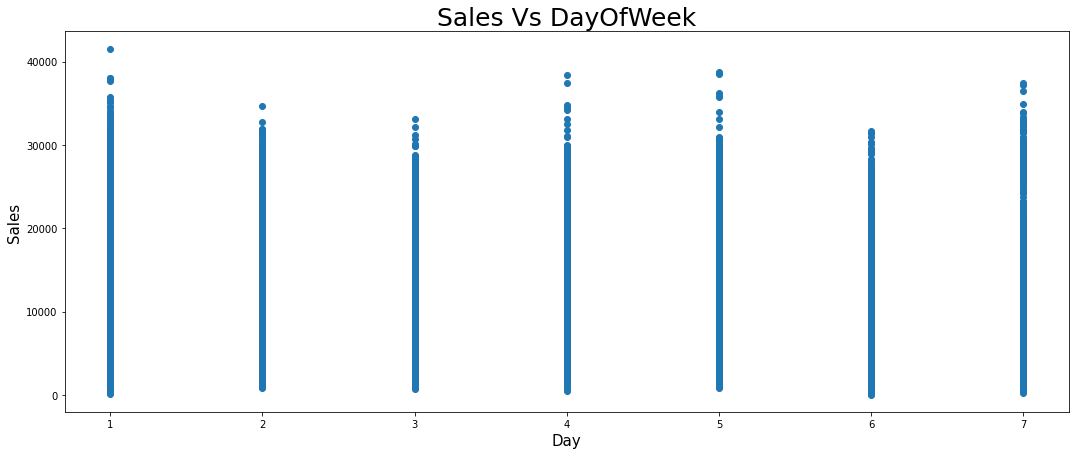

In [159]:
# scatter plot btween Sales Vs DayofWeek
plt.figure(figsize=(18,7))
plt.scatter(x=final_df['DayOfWeek'], y=final_df['Sales'])
plt.title('Sales Vs DayOfWeek',fontsize=25)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

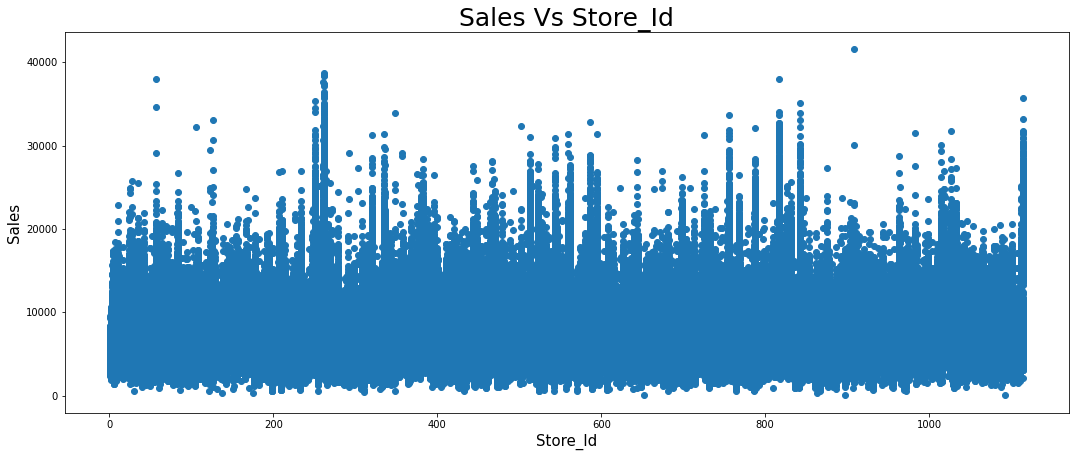

In [160]:
# scatter plot btween Store Vs DayofWeek
plt.figure(figsize=(18,7))
plt.scatter(x=final_df['Store'], y=final_df['Sales'])
plt.title('Sales Vs Store_Id',fontsize=25)
plt.xlabel('Store_Id',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

In [161]:
# independent_variables = [i for i in final_df.columns if i not in ['Sales']]

# # Checking Linearity
# plt.figure(figsize=(30,18))
# for n,column in enumerate(independent_variables):
#   plt.subplot(6, 4, n+1)
#   sns.regplot(data = final_df, x = column, y ='Sales',line_kws={"color": "red"})
#   plt.title(f'Sales v/s {column.title()}',weight='bold')
#   plt.tight_layout()

In [162]:
final_df['log_sales']=np.log(final_df['Sales'])

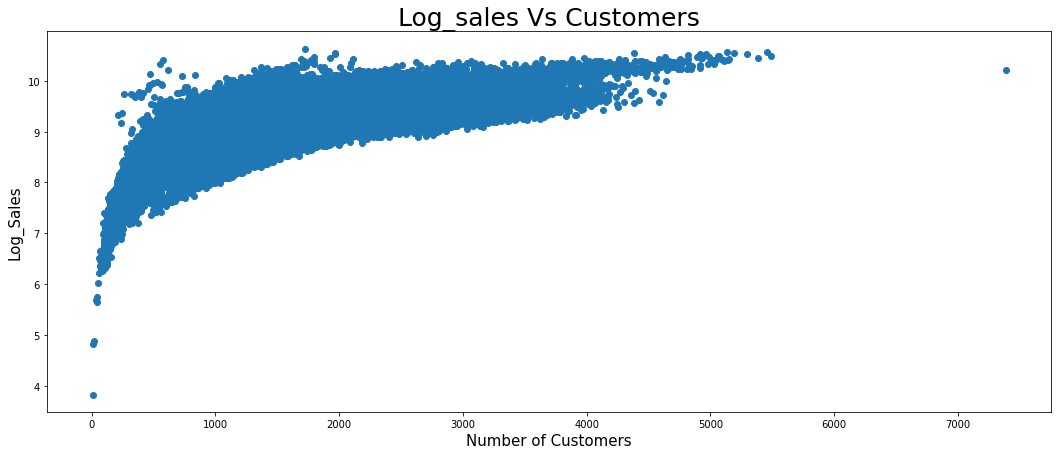

In [163]:
# scatter plot btween log_sales Vs Customers
plt.figure(figsize=(18,7))
plt.scatter(x=final_df['Customers'], y=final_df['log_sales'])
plt.title('Log_sales Vs Customers',fontsize=25)
plt.xlabel('Number of Customers',fontsize=15)
plt.ylabel('Log_Sales',fontsize=15)
plt.show()

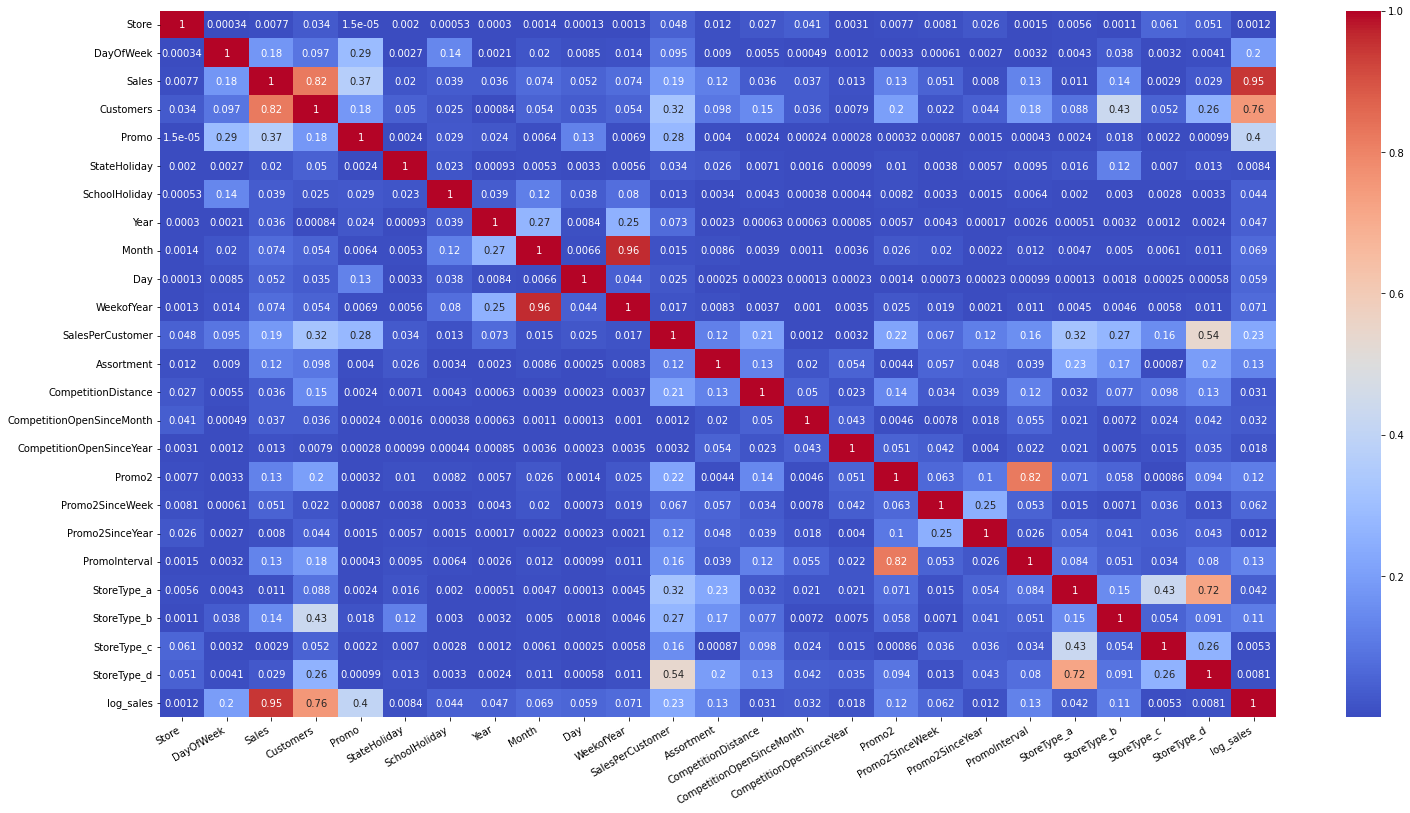

In [164]:
# Checking corelations
plt.figure(figsize=(25,13))
plot=sns.heatmap(abs(final_df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [165]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [166]:
# Checking VIF for each variable
independent_variables = [i for i in final_df.columns if i not in ['Sales','log_sales']]
calc_vif(final_df[independent_variables])

,variables,VIF
0,StoreType_a,5.809873e+06
1,StoreType_d,3.289187e+06
2,StoreType_c,1.435935e+06
3,StoreType_b,1.978117e+05
4,Month,1.405801e+01
5,WeekofYear,1.385696e+01
6,Promo2,3.370507e+00
7,PromoInterval,3.226180e+00
8,SalesPerCustomer,2.004016e+00
9,Customers,1.540769e+00


In [167]:
# Month and week of year highly correlated lets remove one of them
independent_variables = [i for i in final_df.columns if i not in ['Sales','log_sales','Month','StoreType_a','StoreType_b','StoreType_c',
                                                                  'StoreType_d','Year','Promo2SinceYear','CompetitionOpenSinceYear','SalesPerCustomer']]
calc_vif(final_df[independent_variables])

,variables,VIF
0,CompetitionOpenSinceMonth,6.821399
1,Promo2,6.186038
2,Promo2SinceWeek,5.403561
3,PromoInterval,5.280952
4,DayOfWeek,4.727793
5,Customers,4.669523
6,Day,3.975561
7,Store,3.699444
8,WeekofYear,3.532193
9,Promo,1.956727


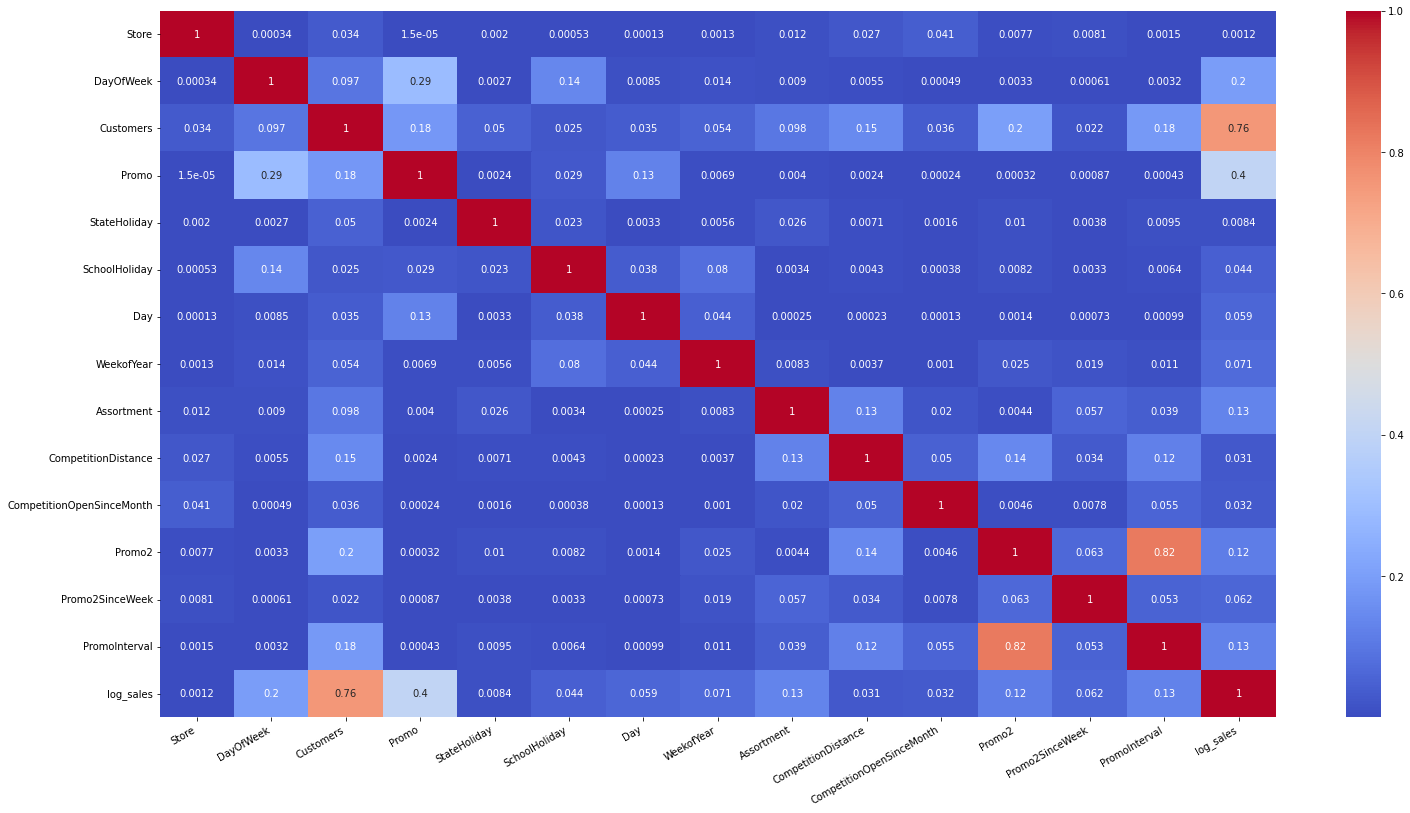

In [168]:
# Updating the dataset
dataset = final_df[independent_variables + ['log_sales']]

#checking corelations
plt.figure(figsize=(25,13))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [169]:
# # Checking Linearity of the dataset
# plt.figure(figsize=(30,16))
# for n,column in enumerate(independent_variables):
#   plt.subplot(4, 4, n+1)
#   sns.regplot(data = dataset, x = column, y ='log_sales',line_kws={"color": "red"})
#   plt.title(f'log_sales v/s {column.title()}',weight='bold')
#   plt.tight_layout()

# Step 4: Model Building

---




In [170]:
# Defining variables required
scaler = MinMaxScaler()
y = dataset['log_sales']
features = [i for i in dataset.columns if i not in ['log_sales']]

In [171]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)

  # Calculating Evaluation Matrix
  mse_train = mean_squared_error(y_train,y_pred_train)
  mse_test = mean_squared_error(y_test,y_pred_test)
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  r2_score_train = r2_score(y_train,y_pred_train)
  r2_score_test=r2_score(y_test,y_pred_test)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE of train dataset:" , mse_train)
  print("MSE of test dataset:" , mse_test)
  print("RMSE of train dataset :" ,rmse_train)
  print("RMSE of test dataset :" ,rmse_test)
  print("MAE of train dataset:" ,mean_absolute_error(y_train,y_pred_train))
  print("MAE of test dataset:" ,mean_absolute_error(y_test,y_pred_test))
  print("Train R2 :", r2_score_train)
  print("Test R2 :" ,r2_score_test)
  print("Adjusted R2 : train dataset", 1-(1-r2_score_train)*((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
  print("Adjusted R2 of test dataset: ", 1-(1-r2_score_test)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted sales')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model


In [172]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

# 4.1:Linear Regressor

In [173]:
# Splitting the data into train and test
X= dataset[independent_variables] 
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

MSE of train dataset: 0.060856707178023044
MSE of test dataset: 0.060335646992591106
RMSE of train dataset : 0.24669152230675265
RMSE of test dataset : 0.24563315532026841
MAE of train dataset: 0.18364443505894334
MAE of test dataset: 0.1830574472841855
Train R2 : 0.6637110779064678
Test R2 : 0.6656286072566617
Adjusted R2 : train dataset 0.6637041077235403
Adjusted R2 of test dataset:  0.6656008837368048


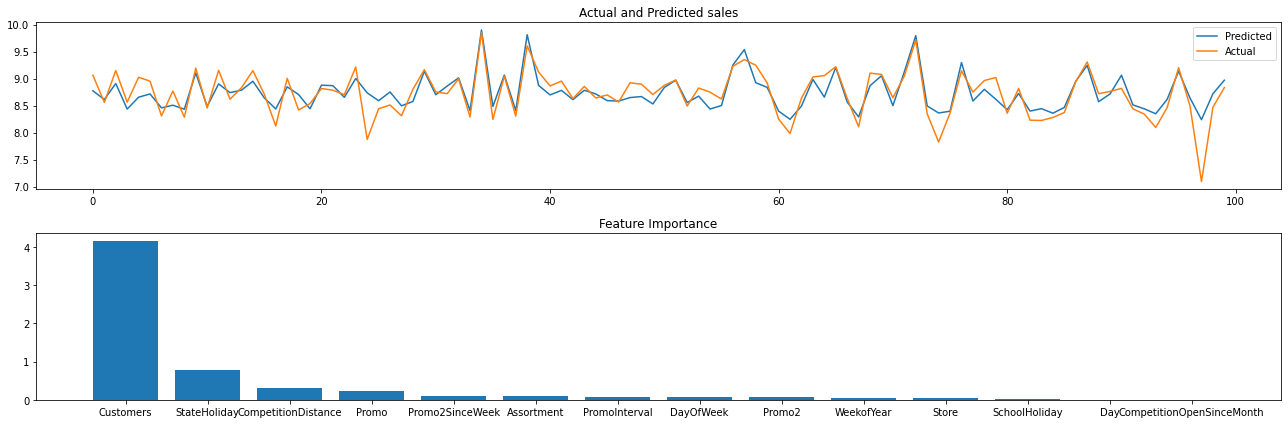

LinearRegression()

In [174]:
# Fitting Linear Regression Model
lr = LinearRegression()
analyse_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)

# 4.1.1 : Lasso Regression

MSE of train dataset: 0.08278713648709311
MSE of test dataset: 0.08218928796255844
RMSE of train dataset : 0.28772753863176376
RMSE of test dataset : 0.286686741867423
MAE of train dataset: 0.22351767562060124
MAE of test dataset: 0.2228886282064935
Train R2 : 0.5425254144787417
Test R2 : 0.5445189029298292
Adjusted R2 : train dataset 0.5425159325085183
Adjusted R2 of test dataset:  0.5444811379190861


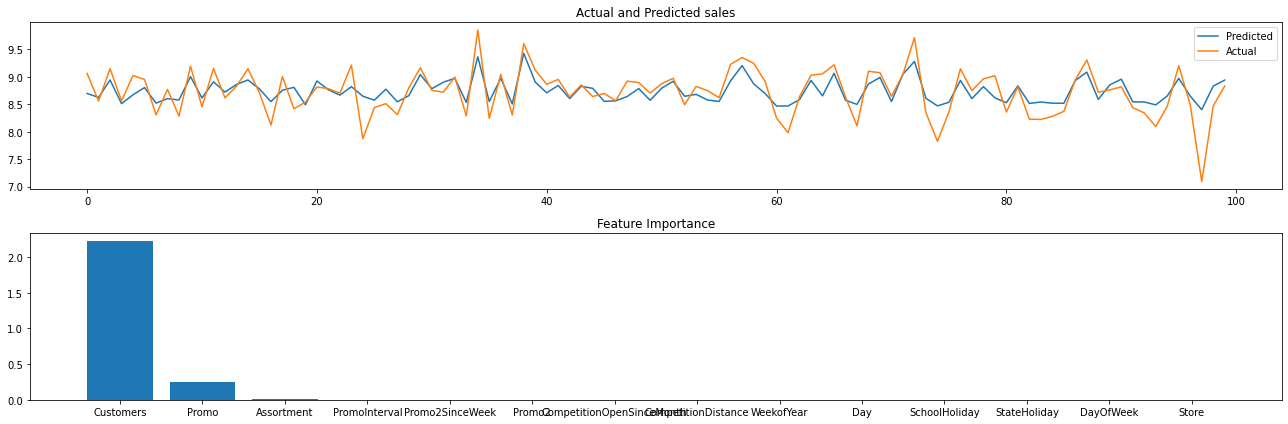

Lasso(alpha=0.01, max_iter=3000)

In [175]:
# fitting lasso regressor
lasso = Lasso(alpha=0.01, max_iter=3000)
analyse_model(lasso, X_train_scaled, X_test_scaled, y_train, y_test)

# 4.1.2 Ridge Regression:

MSE of train dataset: 0.06085670717942384
MSE of test dataset: 0.060335647082253974
RMSE of train dataset : 0.24669152230959182
RMSE of test dataset : 0.2456331555027822
MAE of train dataset: 0.18364453340361103
MAE of test dataset: 0.18305754660523102
Train R2 : 0.6637110778987271
Test R2 : 0.6656286067597631
Adjusted R2 : train dataset 0.6637041077157995
Adjusted R2 of test dataset:  0.665600883239865


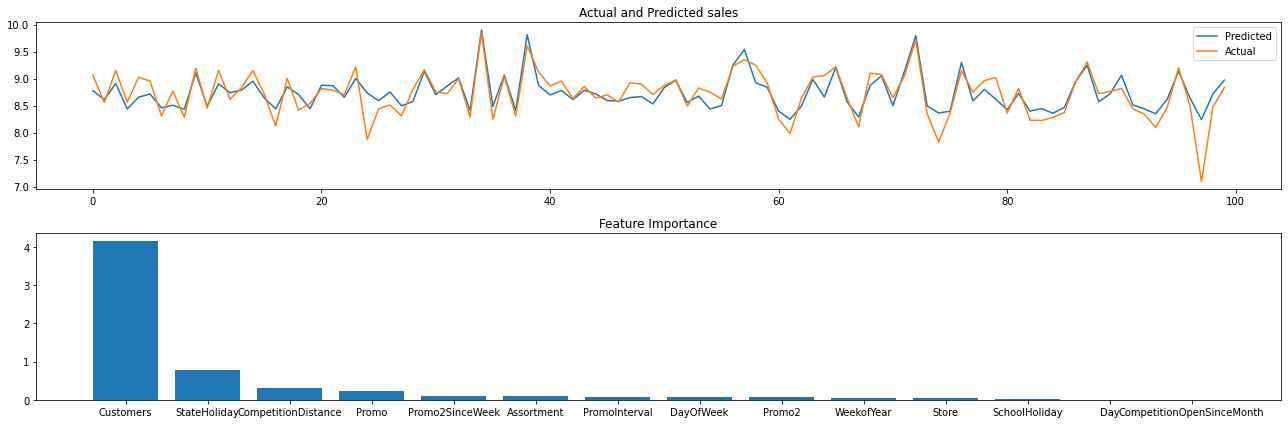

Ridge(alpha=0.01)

In [176]:
#  Fitting Ridge regressor
ridge= Ridge(alpha=0.01)
analyse_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test)

# 4.1.3 : Elastic Net Regression

MSE of train dataset: 0.09441888971307563
MSE of test dataset: 0.09375068807875178
RMSE of train dataset : 0.3072765687667637
RMSE of test dataset : 0.30618734147373206
MAE of train dataset: 0.23960197375763026
MAE of test dataset: 0.23900976227481993
Train R2 : 0.4782493480300427
Test R2 : 0.48044730261386226
Adjusted R2 : train dataset 0.47823853382461445
Adjusted R2 of test dataset:  0.4804042252758024


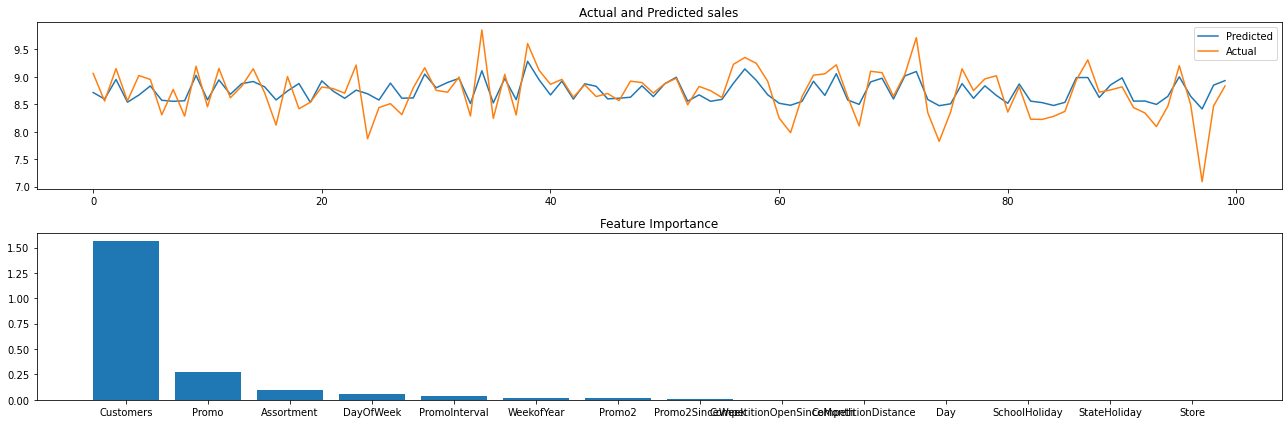

ElasticNet(alpha=0.01)

In [177]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
analyse_model(elasticnet, X_train_scaled, X_test_scaled, y_train, y_test)

# 4.2: Decision Tree Regressor


MSE of train dataset: 0.024237041172191956
MSE of test dataset: 0.024632527198068868
RMSE of train dataset : 0.15568250117528287
RMSE of test dataset : 0.1569475300795424
MAE of train dataset: 0.1216260938925183
MAE of test dataset: 0.12252704924188833
Train R2 : 0.8660681980921174
Test R2 : 0.8634901117905003
Adjusted R2 : train dataset 0.866065422118549
Adjusted R2 of test dataset:  0.8634787934340901


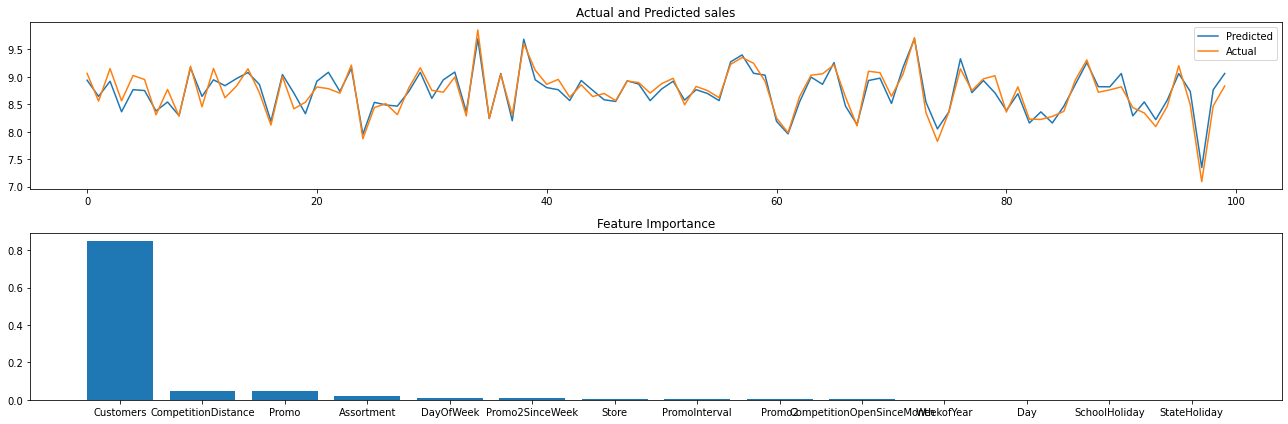

DecisionTreeRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      random_state=1)

In [178]:
# Regressor
regressor = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dt.fit(X_train_scaled, y_train)

# Analysing the model with best set of parameters
analyse_model(dt.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# 5. Conclusions:


---

1. From correlation matrix, we can say that 'Customers' feature is highly correlated to Sales (dependent Varible).
2. The 'Month' feature was removed instead of 'WeekOftheYear' because these both features were correlated and 'Month' is less correlated with 'Sales' compared to later one.
3. In linear regression, Customers is the most influencing feature and StateHoliday is at the second place.
4. In Decision Tree Regressor, Customers is the most influencing feature and CompetitionDistance is at the second place.
5. From metrics, we can see that our models are not overfitting.
6. RMSE Comparisons (For Test dataset) :
   
   A. Linear Regresiion: 0.2456

   B. Decision Tree Regressor: 0.157

   C. Lasso Regressor: 0.286

   D. Ridge Regressor: 0.245

   E. Elastic Net Regressor: 0.306

7. R2 Score of test dataset:

   A. Linear Regression: 0.666

   B. Decision Tree Regressor: 0.863

   C. Lasso Regressor: 0.544

   D. Ridge Regressor: 0.666

   E. Elastic Net Regressor: 0.480

8. Adjusted R2 of test dataset:

   A. Linear Regression: 0.666

   B. Decision Tree Regressor: 0.863

   C. Lasso Regressor: 0.545

   D. Ridge Regressor: 0.666

   E. Elastic Net Regressor: 0.480


In [180]:
print("Decision Tree Regressor giving good results compared to Linear regressor, lasso and ridge regressor.")

Decision Tree Regressor giving good results compared to Linear regressor, lasso and ridge regressor.
